<a href="https://colab.research.google.com/github/yih789/Data-Analysis-and-Image-Processing/blob/master/KNN_%EC%88%AB%EC%9E%90_%EC%9D%B8%EC%8B%9D_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN 숫자 인식 예제
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/17.%20KNN%20%EC%88%AB%EC%9E%90%20%EC%9D%B8%EC%8B%9D%20%EC%98%88%EC%A0%9C/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20KNN%20%EC%88%AB%EC%9E%90%20%EC%9D%B8%EC%8B%9D%20%EC%98%88%EC%A0%9C.pdf)

**숫자 이미지 분류하여 저장하기**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png


In [0]:
import cv2
import numpy as np

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 세로로 50줄, 가로로 100줄로 사진을 나눈다.
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

# 각 (20 x 20) 크기의 사진을 한 줄(1 x 400)으로 바꾼다.
train = x[:, :].reshape(-1, 400).astype(np.float32)

#0이 500개, 1이 500개, ...로 총 5,000개가 들어가는 (1 x 5000) 배열을 만든다.
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]

np.savez("trained.npz", train = train, train_labels = train_labels)

(50, 100, 20, 20)


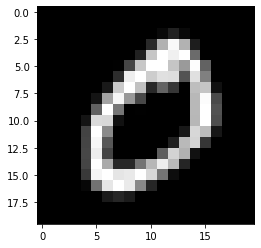

True

In [0]:
import matplotlib.pyplot as plt

# 하나씩 글자를 출력할 수 있다.
plt.imshow(cv2.cvtColor(x[0, 0], cv2.COLOR_GRAY2RGB))
plt.show()

# 글자를 하나씩 Colab 환경에 저장한다.
cv2.imwrite("test_0.png", x[0, 0])
cv2.imwrite("test_1.png", x[5, 0])
cv2.imwrite("test_2.png", x[10, 0])
cv2.imwrite("test_3.png", x[15, 0])
cv2.imwrite("test_4.png", x[20, 0])
cv2.imwrite("test_5.png", x[25, 0])
cv2.imwrite("test_6.png", x[30, 0])
cv2.imwrite("test_7.png", x[35, 0])
cv2.imwrite("test_8.png", x[40, 0])
cv2.imwrite("test_9.png", x[45, 0])



**KNN 숫자 인식**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving num2.PNG to num2.PNG


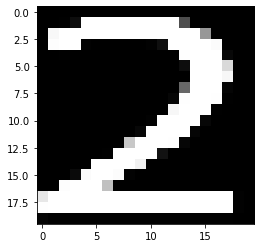

[[2.]]


"\nfor file_name in glob.glob('./test_*.png'):\n  test = resize20(file_name)\n  result = check(test, train, train_labels)\n  print(result)\n"

In [0]:
import cv2
import numpy as np
import glob

FILE_NAME = "trained.npz"

# 파일로부터 학습 데이터를 불러온다.
def load_train_data(file_name):
  with np.load(file_name) as data :
    train = data['train']
    train_labels = data['train_labels']
    return train, train_labels

# 손 글씨 이미지를 (20 x 20) 크기로 Scaling한다.
def resize20(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray, (20, 20))
  gray_resize = cv2.bitwise_not(gray_resize)
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  # 최종적으로는 (1 X 400) 크기로 반환한다.
  return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
  # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾는다.
  ret, result, neighbours, dist = knn.findNearest(test, k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

# 인터넷에서 가져온 사진을 바탕으로 테스트 해보기
test = resize20("num2.PNG")
result = check(test, train, train_labels)
print(result)
'''
for file_name in glob.glob('./test_*.png'):
  test = resize20(file_name)
  result = check(test, train, train_labels)
  print(result)
'''